## Logistic regression

In this part, we consider the support vector machine problem:
\begin{equation}
\min_{w\in\mathbb{R}^m}\varphi(w):=\frac{\lambda}{2}\Vert w\Vert^2+\frac{1}{n}\sum_{i=1}^n \log(1+\exp(1-y_iw^Tx_i)) \quad\text{ with } \lambda=0.00001
\end{equation}

In [6]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import random as r
from timeit import default_timer as timer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
data= pd.read_csv('/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/heart.dat',sep=" ", header=None)
print(data.shape)
nameData = data.copy()
nameData.columns = ['Age', 'Sex','ChestPainType','RestBloodPressure','SerumCholestoral','FastingBloodSugar',
                   'RestingElectrocardResult','MaxHeartRate','ExerciseInducedAngina',
                   'Oldpeak','SlopePeak','NumMajorVessels', 'thalCode','HeartDisease']
nameData.head() # Preview Data

(270, 14)


,Age,Sex,ChestPainType,RestBloodPressure,SerumCholestoral,FastingBloodSugar,RestingElectrocardResult,MaxHeartRate,ExerciseInducedAngina,Oldpeak,SlopePeak,NumMajorVessels,thalCode,HeartDisease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [0]:
heart = '/content/drive/My Drive/Colab Notebooks/nt_toolbox/data/heart.dat'
data=np.loadtxt(heart, unpack=True)

## Model training

In [0]:
A=np.transpose(data[0:-1])[0:220]
(n,m)=A.shape
Y=np.transpose(2*(data[-1][0:220]-1.5*np.ones(n)))
T=[[0 for x in range(m+1)] for y in range(n)]
X=np.array(T)
for i in range(n):
    for j in range(m):
        X[i][j]=A[i][j]
for i in range(n):
    X[i][m]=1

### Subgradient descent method

In [0]:
def subdiff(w,matrix,col):
    (n,m)= matrix.shape
    u=[1 for i in range (m)]
    v=0.0000001*w
    for i in range(n):
        v+= -1/n*col[i]*np.transpose(matrix[i][:])/(1+np.exp(col[i]*np.matmul(np.transpose(w),matrix[i][:])))
    return v

In [0]:
def fvalue(matrix,col,w):
    (n,m)=matrix.shape
    v=0.0000001/2*np.linalg.norm(w,ord=2)**2
    for i in range(n):
        v += 1/n*np.log(1+np.exp(-col[i]*np.matmul(np.transpose(w),matrix[i][:])))
    return v

In [0]:
## Subgradient descent method
def regress(matrix,col):
    (n,m)= matrix.shape
    w = np.ones(m)
    fbest=100*np.ones(10001)
    value=np.ones(10000)
    for i in range(10000):
        v=subdiff(w,matrix,col) #choose a subgradient
        w += -1/np.sqrt(i+1)*v# x^{k+1}=x^k-f(x^k)/(norm(v)^2)*v
        value[i]=fvalue(X,Y,w) #compute f(x^{k+1})
        if value[i]<fbest[i]:#store fbest
            fbest[i+1]=value[i]
        else:
            fbest[i+1]=fbest[i]
    return (w, value, fbest)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


time= 37.329331132000334
value= [        inf         inf         inf ... 13.19999731 13.19884142
 13.1976858 ]
fbest= [100.         100.         100.         ...  13.19999731  13.19884142
  13.1976858 ]


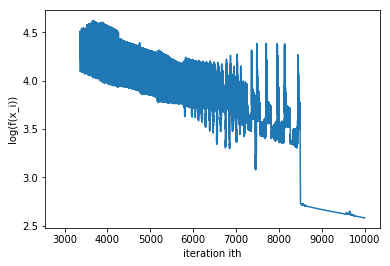

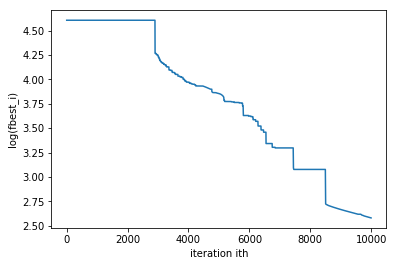

In [13]:
start = timer()
(gdm,value, fbest)=regress(X,Y)
end = timer()
print('time=',end - start)
#print('x=',x)
print('value=',value)
print('fbest=',fbest)
import matplotlib.pyplot as plt
plt.plot(np.log(value))
plt.xlabel('iteration ith')
plt.ylabel('log(f(x_i))')
plt.show()
plt.plot(np.log(fbest))
plt.xlabel('iteration ith')
plt.ylabel('log(fbest_i)')
plt.show()

### Stochastic subgradient descent method

In [0]:
def subdiffsto(w,matrix,col):
    (n,m)= X.shape
    v=0.0000001*w-col*np.transpose(matrix)/(1+np.exp(col*np.matmul(np.transpose(w),np.transpose(matrix))))
    return v

In [0]:
##Stochastic subgradient descent method
def storegress(matrix,col):
    (n,m)= matrix.shape
    w = np.ones(m)
    fbest=100*np.ones(100001)
    a=np.ones(m)
    value=np.ones(100000)
    for i in range(100000):
        j=r.randint(0,n-1) #choose randomly j in [0,n-1]
        v=subdiffsto(w,matrix[j][:],col[j]) #choose a subgradient of |a_j'x-b_j|
        w += -1/np.sqrt(i+1)*v #x^{k+1}=x^k-1/(norm(v)*sqrt(i+1))*v
        value[i]=fvalue(X,Y,w) #compute f(x^{k+1})
        if value[i]<fbest[i]:#store fbest
            fbest[i+1]=value[i]
            a+=-a+w
        else:
            fbest[i+1]=fbest[i]
    return (a, w, value, fbest)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


time= 143.574460629
value= 61.205854303074766
fbest= 20.35395447354517


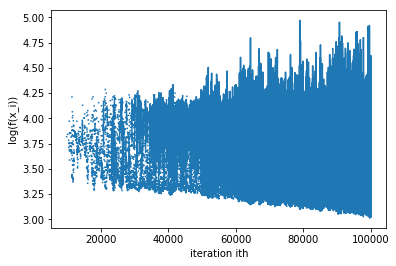

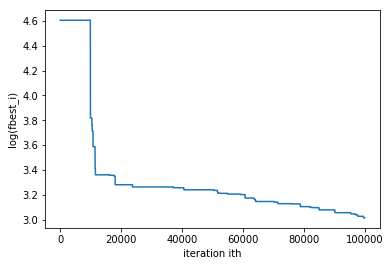

In [16]:
start = timer()
(wstobest,stogdm,value, fbest)=storegress(X,Y)
end = timer()
print('time=',end - start)
#print('x=',x)
print('value=',value[99999])
print('fbest=',fbest[100000])
import matplotlib.pyplot as plt
plt.plot(np.log(value))
plt.xlabel('iteration ith')
plt.ylabel('log(f(x_i))')
plt.show()
plt.plot(np.log(fbest))
plt.xlabel('iteration ith')
plt.ylabel('log(fbest_i)')
plt.show()

## Model testing

In [17]:
B=np.transpose(data[0:-1])[220:270]
(n,m)=B.shape
print(B.shape)
C=np.transpose(data[-1])[220:270]
Test=[[0 for x in range(m+1)] for y in range(n)]
Xtest=np.array(Test)
for i in range(n):
    for j in range(m):
        Xtest[i][j]=B[i][j]
for i in range(n):
    Xtest[i][m]=1
#prettyP(Xtest)

(50, 13)


In [18]:
y1=np.matmul(Xtest,gdm)
y2=np.matmul(Xtest,stogdm)
for i in range(n):
    if y1[i]>0:
        y1[i]=2
    else:
        y1[i]=1
for i in range(n):
    if y2[i]>0:
        y2[i]=2
    else:
        y2[i]=1
print(y1)
print(y2)
count1=0
for i in range(n):
    if y1[i]==C[i]:
        count1+=1
eff1=count1/n
count2=0
for i in range(n):
    if y2[i]==C[i]:
        count2+=1
eff2=count2/n
print('efficiency1=',eff1)
print('efficiency2=',eff2)

[2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 1. 1. 1.
 1. 2. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1.
 2. 2.]
[2. 2. 1. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 1. 1.]
efficiency1= 0.82
efficiency2= 0.72


Comparing the results, we conclude that logistic regression and svm perform similarly in this problem.